# Scenario: Predict Employee Attrition using Classification Algorithms  
Employee attrition is one of the biggest metrics that a company should have in mind when thinking of growth. Employee attrition is caused when the total strenght of the company is greatly reduced as more employees leave the company as expected.
So, what is **Attrition**? It is basically the turnover rate of employees in a particular organization.
* Reasons for *Attrition*:
  - Employees looking for better oportunities
  - A negative working environment
  - Bad managemet
  - Sickness of an employee
  - Excessive working hours

# Problem Statement 
Uncover the factors that lead to employee attrition and explore the resons as to why people are leaving the organization and predict whether an employee will leave the company or not.

# Dataset Description 
The dataset contains the following attributes:

* satisfaction_level 
* last_evaluation 
* number_project 
* average_monthly_hours 
* time_spend_company 
* work_accident 
* quit 
* promotion_last_5years
* department
* salary

### Import the required libraries for data manipulation, visualization, modeling and evaluation, as well as tools that help us visually render the resulting structure.

In [1]:
# Data Manipulation and Visualization 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Modeling and evaluation tools 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn import tree # For decision tree visualization.
from graphviz import Source # Renders the DOT format into a visualization.
from IPython.display import display, Image # Tools to display the visualization in the notebook.
from ipywidgets import IntSlider, interact # Tools for interactive parameter tuning.

# Supress warnings 
import warnings
warnings.filterwarnings('ignore')

# Set default plot style
sns.set_style('whitegrid')
sns.set_palette('colorblind')
print('Libraries imported')

Libraries imported


In [2]:
# Load the dataset into a Dataframe  
df = pd.read_csv('datasets/employee_data.csv') 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


None

In [4]:
# Basic descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
# Rename the columns to a standardized and easy to manipulate format 
df.columns = df.columns.str.lower().str.strip()
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [6]:
# Rename the `quit` column 
df = df.rename(columns={'left': 'target'}) 
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'target',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

## 🔍 Univariate Analysis
---

This section aims to explore and summarize the characteristics of features in the dataset independently. This foundational step is critical for understanding the data's structure, central tendencies, and variability before proceeding to bivariate analysis or model building.

### **Objectives:**

* **Distribution Analysis:** To explore the frequency distribution of each individual variable, revealing the underlying data structure and patterns.
* **Data Visualization:** To visualize key distributions using appropriate plots.
* **Outlier and Skewness Detection:** To identify potential **outliers** and assess the **skewness** in numerical variables, and decide whether they have an impact on the model.


In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Create a function to plot distribution and box plots for numerical features
def plot_numerical_features(dataframe, numerical_features):
    for feature in numerical_features:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Distribution plot
        sns.histplot(data=dataframe, x=feature, kde=True, ax=axes[0])
        axes[0].set_title(f'Distribution of {feature}')
        
        # Box plot
        sns.boxplot(data=dataframe, x=feature, ax=axes[1])
        axes[1].set_title(f'Box plot of {feature}')
        
        plt.tight_layout()
        plt.show()

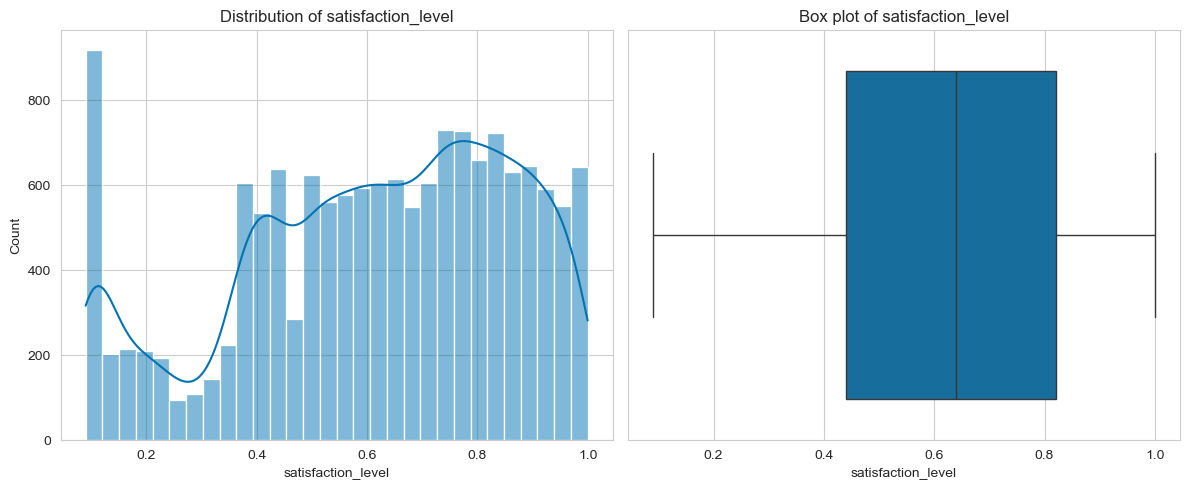

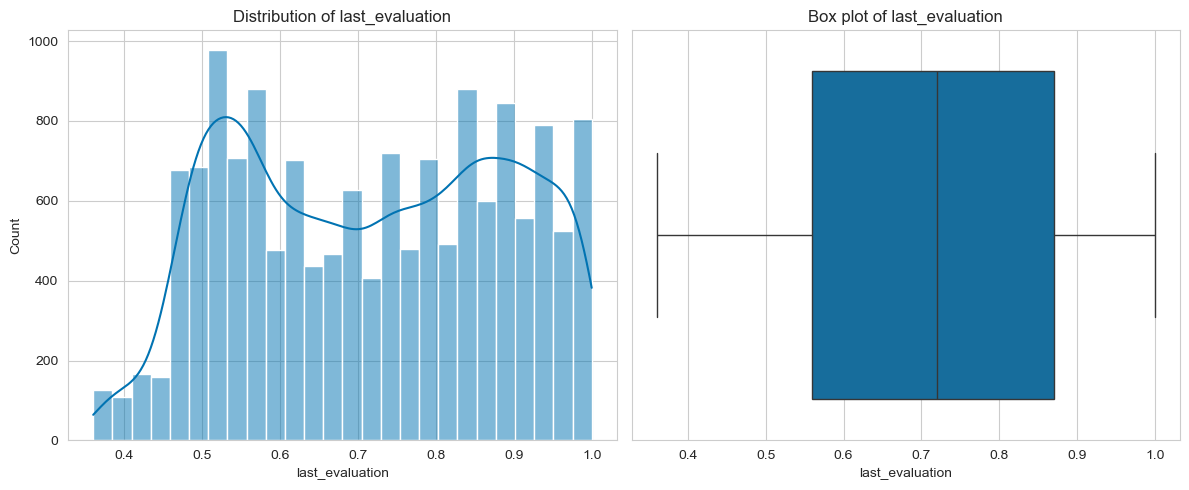

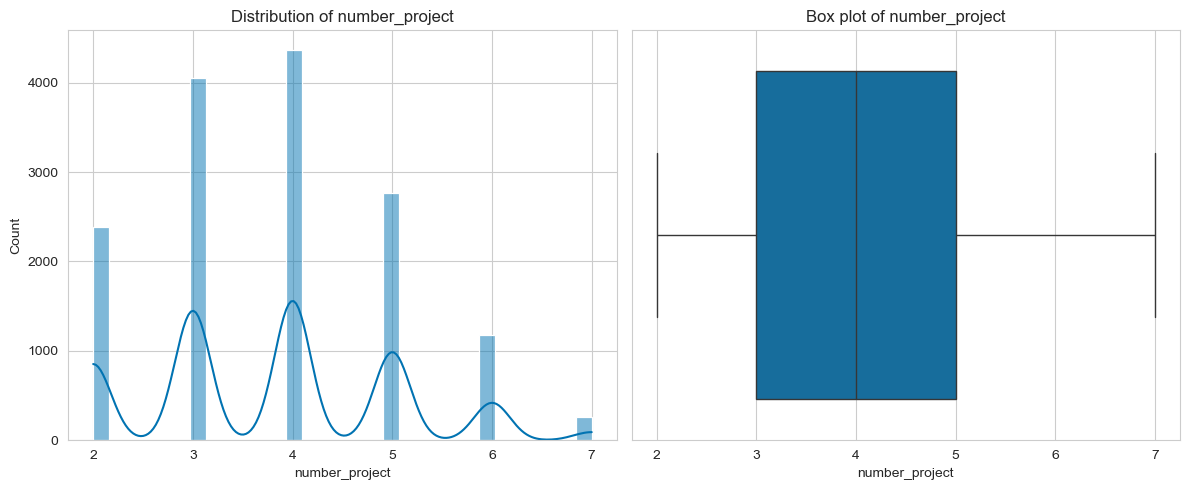

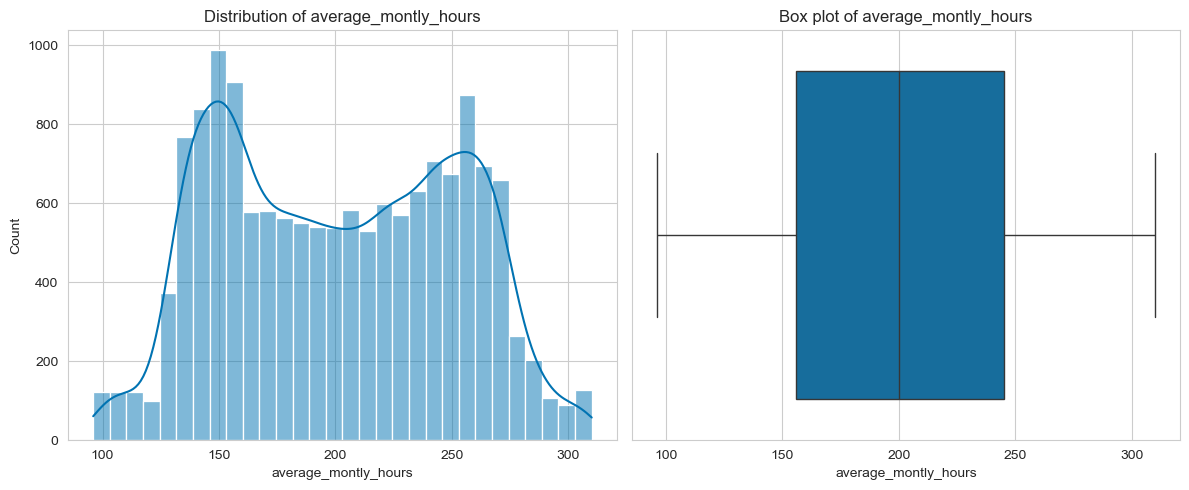

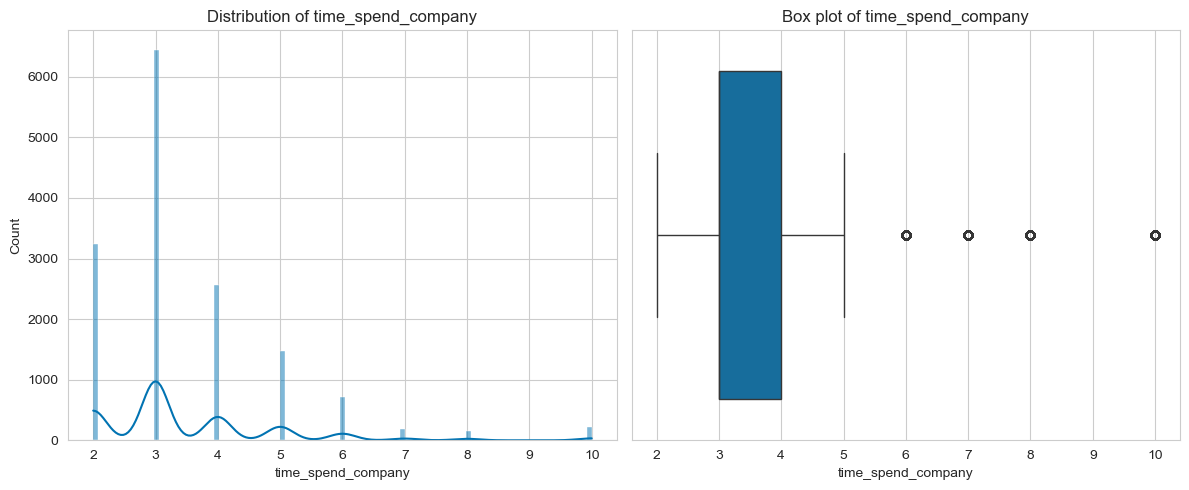

In [9]:
plot_numerical_features(df, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'])

# 📊 KEY INSIGHTS 
-----
**1. DATA QUALITY & COMPLETENESS**:
* The dataset contains 14,999 `non-null entries`, meaning there are no `missing values` to handle.

**2. ATTRITION RATE** (Target Variable 'left'):
* The mean of the `'left'` column is 0.238. This indicates that 23.8% of employees left the company, highlighting a high attrition rate.

**3. EMPLOYEE SATISFACTION** ('satisfaction_level'):
* The average satisfaction level is 0.61 (out of 1.0).
* Crucially, the minimum satisfaction is 0.09, suggesting a group of highly dissatisfied employees which may contribute heavily to attrition.

**4. WORKLOAD** ('average_monthly_hours'):
* `Average monthly hours`abs stand at 201.
* There is an extremely wide range, from a minimum of 96 hours to a maximum of 310 hours, pointing to potential burnout issues among some employees.

**5. TENURE** ('time_spend_company') and **PROJECTS** ('number_project'):
* The average `tenure` is 3.5 years, and we see some values up to ten years.
* The majority of employees work on 3 to 5 `projects`.


# Bivariate Analysis 
-----------

This section focuses on examining the relationships between pairs of variables, especially the connection between the independent variables and the target variable (`Attrition`). The objective is to identify the main factors influencing employee turnover.

### **Objectives:**

* **Identifying Key Predictors:** To determine which features demonstrate the strongest correlation or a statistically significant relationship with the target variable.
* **Impact Visualization (Numerical Features):**  to compare the distribution of key numerical variables  across the target classes.
* **Categorical Frequency Analysis:** to visualize the attrition rate for each categorical level.
* **Correlation Measurement:** To calculate and visualize the **Correlation Matrix**  to understand the linear relationships among numerical variables.

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


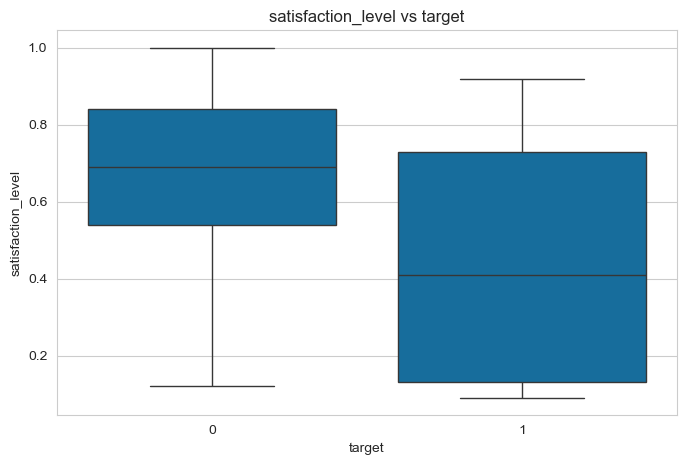

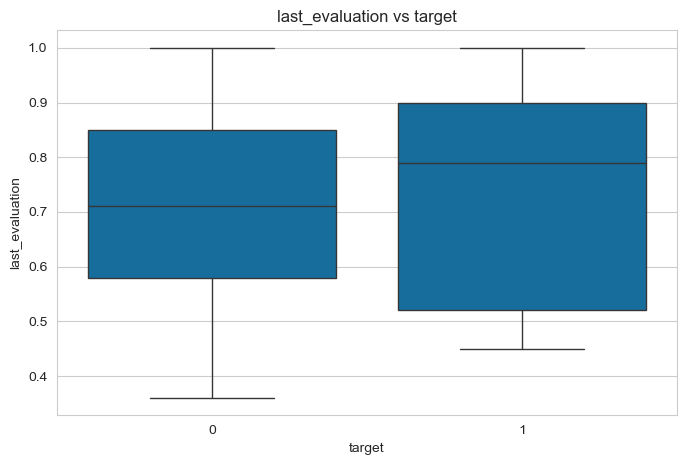

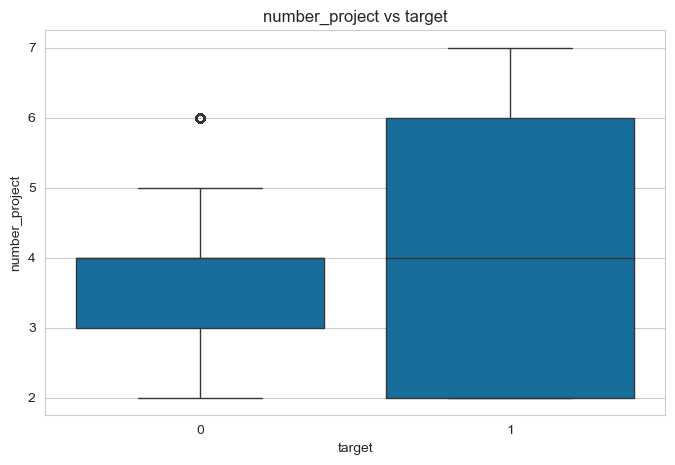

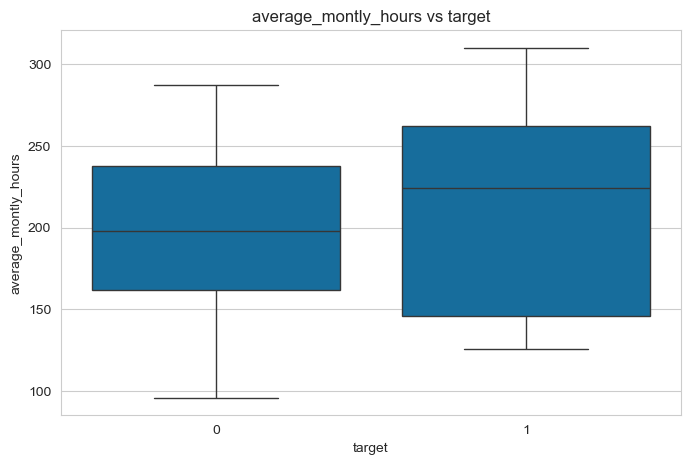

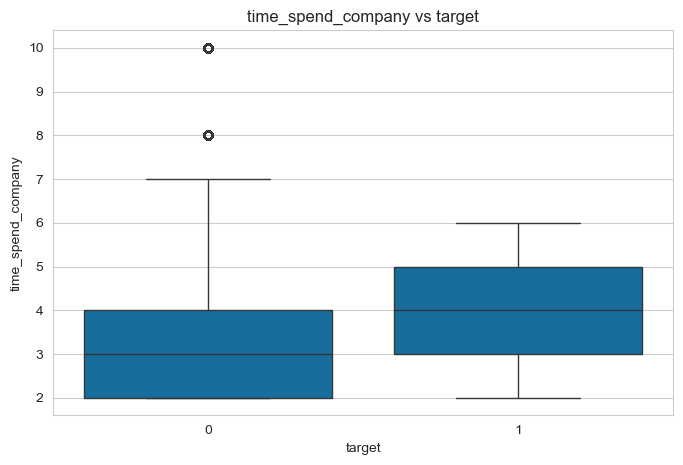

In [11]:
# Bivariate analysis of numerical features against the target variable
def bivariate_numerical_target(dataframe, numerical_features, target):
    for feature in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=target, y=feature, data=dataframe)
        plt.title(f'{feature} vs {target}')
        plt.show()

bivariate_numerical_target(df, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], 'target')

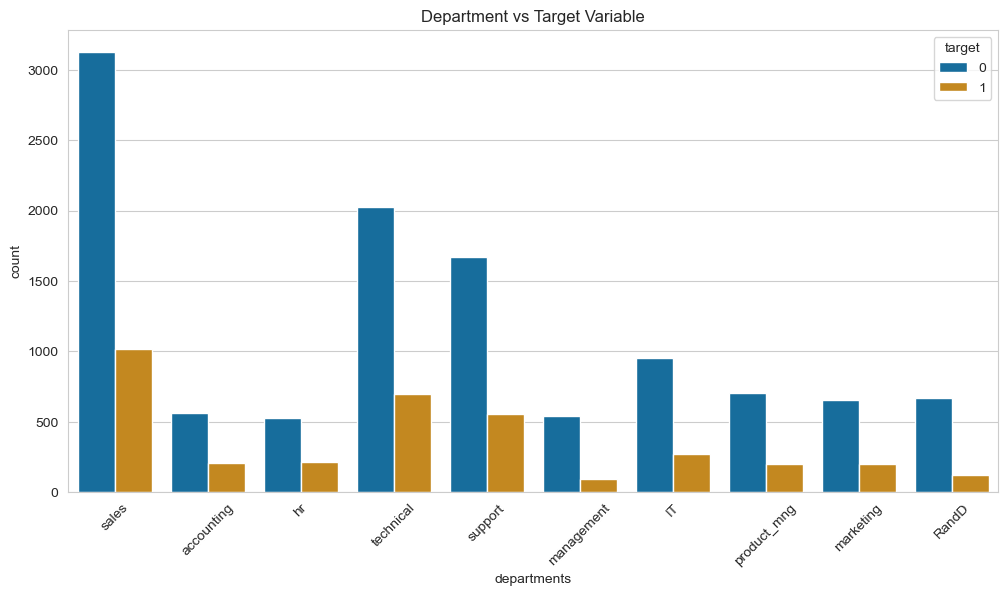

In [12]:
# Departent vs Target Variable
plt.figure(figsize=(12, 6))
sns.countplot(x=df['departments'], hue=df['target'])
plt.title('Department vs Target Variable')
plt.xticks(rotation=45)
plt.show()

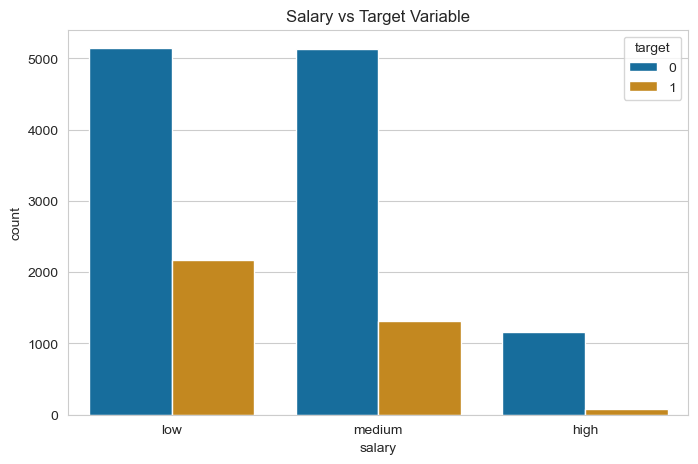

In [13]:
# Salary vs Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x=df['salary'], hue=df['target'])
plt.title('Salary vs Target Variable')  
plt.show()

# Insights from Bivariate Analysis
------

* Employees with lower satisfaction levels tend to leave the company more often.
* Higher average monthly hours are associated with a higher likelihood of leaving.  
* Employees in certain departments (e.g., sales, support) have higher turnover rates.
* Employees with lower salary levels are more likely to leave the company.
* These insights can guide HR strategies to improve employee retention.

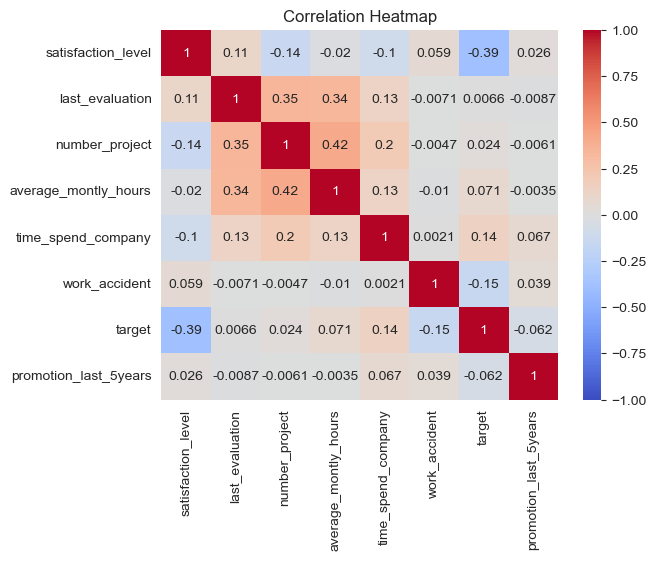

In [14]:
# Confusion Matrix Heatmap
correlation = df.corr(numeric_only=True) 
sns.heatmap(correlation, vmin= -1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
--------------------
> To prepare the data for the model, we need to convert the **categorical features** into **dummy variables**. 

In [15]:
# Categorical variables
cat_vars = df.select_dtypes(include='O').columns.tolist()
print('Categorical Columns: ', cat_vars)

Categorical Columns:  ['departments', 'salary']


In [16]:
# Transfrom categorical variables into dummy variables 
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var) 
    df = df.join(cat_list) 

df = df.drop(cat_vars, axis=1) 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,target,promotion_last_5years,departments_IT,departments_RandD,...,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


# Model Preparation
* Defining Features and Target variables 
* Split Data into Training and Testing Sets

In [17]:
# Check class balance for the target varible 
display(df['target'].value_counts()) 
display(df['target'].value_counts(normalize=True))

target
0    11428
1     3571
Name: count, dtype: int64

target
0    0.761917
1    0.238083
Name: proportion, dtype: float64

> There's definitely a class imbalance in the target variable, but 24% is an acceptable minority ratio. However, this imbalance means that Accuracy alone is insufficient to evaluate the Decision Tree model. Instead, I will prioritize Precision, Recall, and the F1-Score for the minority class (employees who left) to ensure the model is genuinely predictive, rather than simply biased towards the majority class.

In [18]:
# Split the data into features (X) and the target variable (y)
X = df.drop('target', axis=1) 

y = df['target']

In [19]:
# Split into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,   # Test size usually rangess between 0.2 and 0.3 % of the data
                                                    random_state=42,   # Ensures reproducibility
                                                    stratify=y # Ensures the same class proportion
                                                   ) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape                            

((11249, 20), (3750, 20), (11249,), (3750,))

In [20]:
@interact # Convert the function into an interactive one 
def plot_tree(
    crit=['gini', 'entropy'],
    split=['best', 'random'],
    depth=IntSlider(min=1, max=25, value=2, continuous_update=False),
    min_split = IntSlider(min=1, max=5, value=2, continuous_update=False), 
    min_leaf = IntSlider(min=1, max=5, value=1, continuous_update=False)):

    # Create an instance of the decision tree classifier
    estimator = DecisionTreeClassifier(criterion=crit, 
                                       splitter=split, 
                                       max_depth=depth, 
                                       min_samples_leaf=min_leaf, 
                                       min_samples_split=min_split)

    
    estimator.fit(X_train, y_train) # fit the model on the training data 

    # Predictions 
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)

    # Evaluation metrics 
    a = round(accuracy_score(y_train, train_preds), 2)
    b = round(accuracy_score(y_test, test_preds), 2)
    
    print("Decision Tree Training Accuracy: ", a) 
    print("Decision Tree Testing Accuracy: ", b) 

    print("Decision Tree Training F1 Score: ", round(f1_score(y_train, train_preds), 2)) 
    print("Decision Tree Training F1 Score: ", round(f1_score(y_test, test_preds), 2)) 

    if a > 0.99:
         print("Decision Tree Training Accuracy: ", a, "Decision Tree Testing Accuracy: ", b)
         print("Criterion", crit, "Splitter: ", split, "Max Depth: ", depth, "Min Samples Leaf: ", min_leaf, "Min Samples Split: ", min_split) 


    # Use GraphViz to export the model and display it as an image on the screen 
    graph = Source(tree.export_graphviz(estimator, out_file=None, 
                                        feature_names=X_train.columns, 
                                        class_names=['stayed', 'quit'],
                                        filled=True ))
                   
    display(Image(data=graph.pipe(format='png')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [21]:
# Random Forest Classifier
@interact # Convert the function into an interactive one 
def plot_random_forest(
    crit=['gini', 'entropy'],
    depth=IntSlider(min=1, max=20, value=3, continuous_update=False),
    forest = IntSlider(min=1, max=1000, value=100, continuous_update=False), 
    min_split = IntSlider(min=2, max=5, value=2, continuous_update=False),
    min_leaf = IntSlider(min=1, max=5, value=1, continuous_update=False)):

    # Create an instance of the decision tree classifier
    estimator = RandomForestClassifier(random_state=0,
                                       criterion=crit, 
                                       n_estimators=forest, 
                                       max_depth=depth, 
                                       min_samples_leaf=min_leaf, 
                                       min_samples_split=min_split,
                                       n_jobs=-1,
                                       verbose=False)

    
    estimator.fit(X_train, y_train) # fit the model on the training data 

    # Predictions 
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)

    # Evaluation metrics 
    a = round(accuracy_score(y_train, train_preds), 2)
    b = round(accuracy_score(y_test, test_preds), 2)
    
    print("Random Forest Training Accuracy: ", a) 
    print("Random Forest Testing Accuracy: ", b) 

    print("Random Forest Training F1 Score: ", round(f1_score(y_train, train_preds), 2)) 
    print("Random Forest Training F1 Score: ", round(f1_score(y_test, test_preds), 2))  
    if a > 0.99:
         print("Random Forest Training Accuracy: ", a, "Random Forest Testing Accuracy: ", b)
         print("Criterion", crit, "N_estimators:", forest, "Max Depth: ", depth, "Min Samples Leaf: ", min_leaf, "Min Samples Split: ", min_split) 


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), IntSlider(value…

### Both Estimators have a great performance on this dataset with accuracy scores above 97%, and a F1 score above 0.9. 
The Random Forest Classifier outperforms the Decision Tree Classifier slightly in testing F1 score. This is expected as Random Forests, being an ensemble method, generally provide better generalization by reducing overfitting compared to a single decision tree.


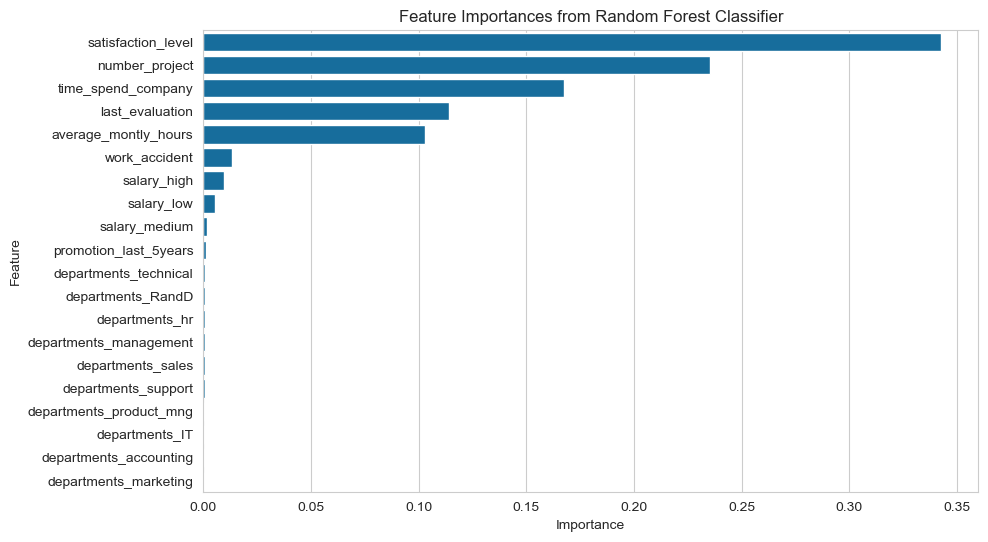

In [22]:
# Feature Importance from Random Forest 
clf = RandomForestClassifier(random_state=0,
                             n_estimators=20,
                             max_depth=7) 
clf.fit(X_train, y_train) 

# Get feature importances 
importances = clf.feature_importances_ 

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) 
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

> Now that I have implemented both Decision Tree and Random Forest classifiers, and found that Random Forest performs better, I can proceed to fine-tune the Random Forest model further or explore other ensemble methods for potentially improved performance for a production-level model.

In [23]:
# Create Feature variable based on feature importance
important_features = feature_importances[feature_importances['Importance'] > 0.05]['Feature'].tolist()
X_important = X[important_features]

X_important.head()

,satisfaction_level,number_project,time_spend_company,last_evaluation,average_montly_hours
0,0.38,2,3,0.53,157
1,0.80,5,6,0.86,262
2,0.11,7,4,0.88,272
3,0.72,5,5,0.87,223
4,0.37,2,3,0.52,159


In [24]:
# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_important, y,
                                                    test_size=0.25,   # Test size usually rangess between 0.2 and 0.3 % of the data
                                                    random_state=42,   # Ensures reproducibility
                                                    stratify=y # Ensures the same class proportion
                                                   ) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11249, 5), (3750, 5), (11249,), (3750,))

In [25]:
# Production ready Random Forest model
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [10, 50, 70, 90, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 7, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=0)
randomized_search = RandomizedSearchCV(estimator=rf,
                                        param_distributions=param_grid,
                                        n_iter=50,
                                        cv=3,
                                        verbose=2,
                                        scoring='f1',
                                        random_state=42,
                                        n_jobs=-1)
randomized_search.fit(X_train, y_train)
print("Best estimator found by randomized search:")
print(randomized_search.best_estimator_)
print("Best score found by randomized search:")
print(randomized_search.best_score_)    

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best estimator found by randomized search:
RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=0)
Best score found by randomized search:
0.9757752037973377


In [26]:
# Create the final model with the best parameters 
clf = RandomForestClassifier(random_state=0,
                             n_estimators=200,
                             bootstrap=False,
                                max_depth=20
)

clf.fit(X_train, y_train)

print("Final Model Training Accuracy: ", round(accuracy_score(y_train, clf.predict(X_train)), 2)) 
print("Final Model Testing Accuracy: ", round(accuracy_score(y_test, clf.predict(X_test)), 2)) 
print("Final Model Training F1 Score: ", round(f1_score(y_train, clf.predict(X_train)), 2)) 
print("Final Model Testing F1 Score: ", round(f1_score(y_test, clf.predict(X_test)), 2))


Final Model Training Accuracy:  1.0
Final Model Testing Accuracy:  0.99
Final Model Training F1 Score:  1.0
Final Model Testing F1 Score:  0.98


# Conclusion:
* The Random Forest Classifier managed to achieve a perfect accuracy and a F1 score on the training dataset, and an almost perfect accuracy and F1 score on the testing dataset, indicating that it is a robust model for predicting employee attrition. By tuning the hyperparameters using RandomizedSearchCV, we were able to optimize the model's performance further. The feature importance analysis also helped in identifying the most significant features contributing to the predictions, allowing for a more focused approach in future analyses. Overall, the Random Forest Classifier proves to be an effective tool for this classification task.
## Next steps:
- Exposing the model to more data and monitoring its performance over time.
- Setting up a pipeline for automated retraining when performance degrades.
- Integrating the model into a production environment for real-time predictions.